In [1]:
%cd ..

/home/dawood/Workspace/compoundGAN


In [13]:
import torch
import dgl
import networkx as nx
from torch.utils.data import DataLoader
from tqdm import tqdm

from data.zinc import ZINC250K, ZINC_collate, Library
from data import utils
from models.gcn import GCN

from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')

%matplotlib inline
%load_ext line_profiler

atom_list = [i for i in Library.atom_list]
atom_list.append('END')

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [3]:
model = GCN(59, 13, 256, [64, 128, 128])

In [15]:
dataset = ZINC250K('/home/dawood/Datasets/ZINC250K/data.csv')
dataset.max_seq_len = 50

In [16]:
dataloader = DataLoader(dataset, 1, shuffle=True, collate_fn=ZINC_collate)

In [17]:
num_nodes = []
for i, G in tqdm(enumerate(dataloader)):
    #num_nodes.extend(g.batch_num_nodes)
    break

0it [00:00, ?it/s]


In [19]:
%lprun -f utils.atoms2vec dataset[10]

Timer unit: 1e-06 s

Total time: 0.010372 s
File: /home/dawood/Workspace/compoundGAN/data/utils.py
Function: atoms2vec at line 36

Line #      Hits         Time  Per Hit   % Time  Line Contents
    36                                           def atoms2vec(atoms):
    37         1          4.0      4.0      0.0      atom_idx      = []
    38         1          3.0      3.0      0.0      charge_idx    = []
    39         1          2.0      2.0      0.0      electron_idx  = []
    40         1          2.0      2.0      0.0      chirality_idx = []
    41         1          2.0      2.0      0.0      aromatic_idx  = []
    42                                           
    43        37         43.0      1.2      0.4      for atom in atoms:
    44                                                   # Element
    45        36        103.0      2.9      1.0          try: idx = Library.atom_list.index(atom.GetSymbol())
    46                                                   except: raise Value

<function matplotlib.pyplot.show(*args, **kw)>

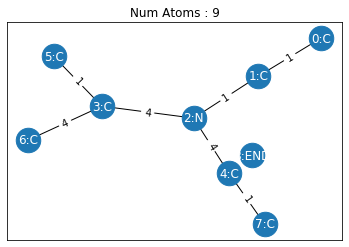

In [9]:
atoms = [atom_list[i] for i in G.ndata['feats'][:, :43].argmax(1).data.cpu()]
G_pred = nx.Graph()
for i, atom in enumerate(atoms):
    G_pred.add_node(i, atom='%d:%s'%(i, atom))

edge_pred = G.edata['feats'][:, :5].argmax(1).data.cpu()
edge_pred_score = G.edata['feats'][:, :5].max(1)[0].data.cpu()

edges = []
edge_num = 0
edge_types = []
for i in range(len(atoms)):
    for j in range(i):
        if edge_pred[edge_num] > 0:
            #print(edge_pred[edge_num].item())
            edges.append((j, i))
            edge_types.append(edge_pred[edge_num].item())
        edge_num += 2
    edge_num +=1

for i in range(len(edges)):
    G_pred.add_edge(*edges[i], bond_type=edge_types[i])

pos = nx.kamada_kawai_layout(G_pred)
node_labels = nx.get_node_attributes(G_pred, 'atom')
nx.draw_networkx(G_pred, pos, font_color='w', node_size=600, labels=node_labels)
#
#nx.draw_networkx_labels(G_pred, pos, labels=node_labels)

if len(edges) < 30:
    edge_labels = nx.get_edge_attributes(G_pred, 'bond_type')
    nx.draw_networkx_edge_labels(G_pred, pos, edge_labels=edge_labels)

plt.title('Num Atoms : %d'%(len(atoms)))
plt.show

In [8]:
g_copy = dgl.batch([dgl.DGLGraph(_g._graph) for _g in dgl.unbatch(g)])
g_copy, g

NameError: name 'g' is not defined

In [11]:
G.ndata['feats'][:, :43]

tensor([[9.4971e-01, 2.4756e-04, 2.4756e-04, 2.4756e-04, 2.4756e-04, 2.4756e-04,
         2.4756e-04, 2.4756e-04, 3.2829e-03, 4.2020e-03, 4.0417e-03, 2.4756e-04,
         2.4756e-04, 1.9999e-03, 2.4756e-04, 4.6864e-03, 2.4756e-04, 5.4227e-03,
         2.4756e-04, 2.4756e-04, 5.0554e-03, 7.0746e-04, 4.8894e-03, 1.6411e-03,
         5.9364e-04, 2.4756e-04, 2.4756e-04, 2.4756e-04, 1.8396e-03, 1.3446e-03,
         2.4756e-04, 2.4756e-04, 2.4756e-04, 2.4756e-04, 1.2096e-03, 1.6108e-03,
         2.4756e-04, 2.4756e-04, 1.1069e-03, 2.4756e-04, 2.4756e-04, 2.4756e-04,
         4.7108e-04],
        [2.9712e-03, 9.3465e-01, 2.4153e-04, 4.9218e-03, 2.4153e-04, 1.2454e-03,
         2.4153e-04, 2.9800e-03, 2.4153e-04, 2.4153e-04, 2.4153e-04, 2.9484e-03,
         2.4153e-04, 2.4153e-04, 5.3058e-03, 5.6043e-04, 2.4153e-04, 3.8470e-03,
         2.0576e-03, 3.2399e-03, 2.4153e-04, 2.4153e-04, 2.4153e-04, 2.4153e-04,
         2.4153e-04, 5.2482e-03, 2.4153e-04, 2.4153e-04, 3.1192e-03, 2.4153e-04,
      

In [ ]:
mask.shape

In [ ]:
len(atom_y)